In [1]:
# importing dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading dataset
data = pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# checking the dataset statistics 
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
# checking the number of rows and columns
data.shape

(2290, 6)

In [6]:
# checking dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking if there are null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# transforming the date column in datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Date'].head()

0   2008-01-02
1   2008-01-03
2   2008-01-04
3   2008-01-07
4   2008-01-08
Name: Date, dtype: datetime64[ns]

In [9]:
# setting a correlation variable
corr = data.corr()

<Axes: >

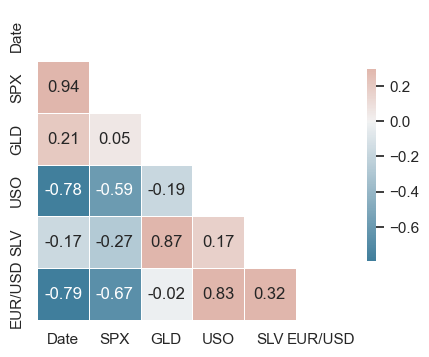

In [10]:
# plotting a correlation graphic

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# identifying the main correlation for Gold
corr['GLD']

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Count'>

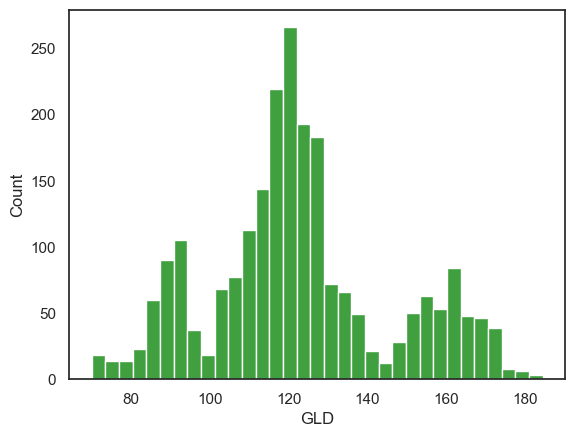

In [12]:
# plotting a historigram for gold
sns.histplot(data['GLD'], color='green')

In [13]:
# splitting the data in feature and target
X = data.drop(['Date', 'GLD'], axis=1)
y = data['GLD']

In [14]:
# splitting the data in train and test samples
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [16]:
# importing the model
from sklearn.ensemble import RandomForestRegressor

In [17]:
# fitting and predictin data
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [19]:
# implementing the metrics to evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
print( 'R2 score = ', r2, '\n')
print( 'Mean absolute error = ', mae, '\n')
print( 'Root mean squared error = ', rmse, '\n')



R2 score =  0.9890576125904126 

Mean absolute error =  1.3400432004803469 

Root mean squared error =  2.4023927907027747 



Text(0.5, 1.0, 'Actual vs Predicted Gold Price')

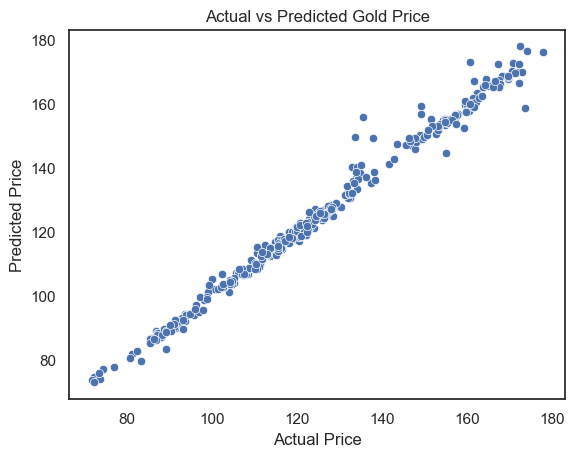

In [20]:
# plotting graphic
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Gold Price')

Text(0.5, 1.0, 'Actual vs Predicted Gold Price')

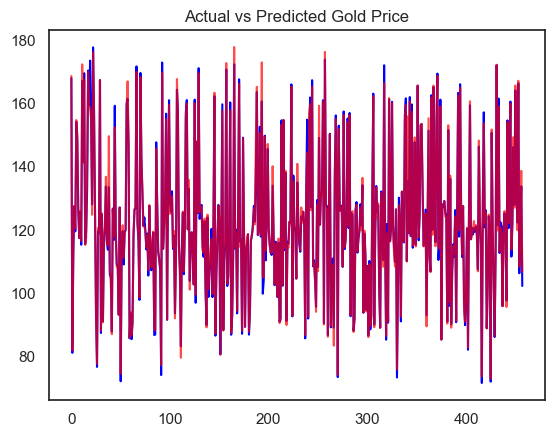

In [21]:
# plotting graphic
y_test = list(y_test)
plt.plot(y_test, color= 'blue')
plt.plot(pred, color='red', alpha=0.7 )
plt.title('Actual vs Predicted Gold Price')